# Dados do Caged/2019 e Novo-Caged/2020 para Curitiba entre Janeiro e Outubro comparado com a incidência dos casos de Covid em Curitiba no período
* Fontes de dados: 
    * Caged: http://pdet.mte.gov.br/caged-meses-anteriores
    * Novo-Caged: http://pdet.mte.gov.br/novo-caged.
    * Covide19:

##### Pacotes Python:
* Pandas: para a leitura dos dados, criação de DataFrame e manipulação dos dados;
* Numpy: criação e manipulação de arrays e matrizes;
* MatplotLib: para plotar os gráficos.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#%config InlineBackend.figure_format='svg'

### Visão geral da planilha: 
* A planilha possui 12 tabelas, das quais optamos por trabalhar com a última, que disponibiliza os dados consolidados por município (série com ajustes). 
* Para facilitar, decidimos excluir o cabeçalho da planilha nas três primeiras linhas.    

In [119]:
data = np.array([[28165,24631,3534],
                 [30979,27382,3597],
                 [26931,27702,-771],
                 [29202,25584,3618],
                 [27675,27211,464],
                 [26652,25023,1629],
                 [29985,27301,2684],
                 [29164,27126,2038],
                 [27455,25471,1984],
                 [29505,26946,2559]        
                 
                ])
data_19 = pd.DataFrame(data,index=(['jan','fev', 'mar','abr', 'mai','jun','jul','ago','set','out']),columns=['adm', 'desl', 'saldos'])



In [120]:
df_19 = data_19.transpose().astype(int)

In [121]:
data_20 = pd.read_excel('datasets/out_2020.xlsx', sheet_name = "Tabela 8", skiprows = range(0, 3))

## Tabela Caged/2019:

In [122]:
df_19

,jan,fev,mar,abr,mai,jun,jul,ago,set,out
adm,28165,30979,26931,29202,27675,26652,29985,29164,27455,29505
desl,24631,27382,27702,25584,27211,25023,27301,27126,25471,26946
saldos,3534,3597,-771,3618,464,1629,2684,2038,1984,2559


## Tabela Caged/2020:

In [98]:
data_20

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70
0,NaN,\nUF,\nCódigo do Município,\nMunicípio,\nEstoque\n1º de Janeiro,Janeiro/2020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,\nAcumulado no Ano,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,Estoque,Admissões,Desligamentos,Saldos,Variação Relativa (%),...,Admissões,Desligamentos,Saldos,Variação Relativa (%),Admissões,Desligamentos,Saldos,Variação Relativa (%),NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,RO,110001,Ro-Alta Floresta D Oeste,1806,1787,51,70,-19,-1.05205,...,---,---,---,---,520,453,67,3.70986,NaN,NaN
4,NaN,RO,110002,Ro-Ariquemes,15600,15524,537,613,-76,-0.487179,...,---,---,---,---,4998,5083,-85,-0.544872,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5638,NaN,Fonte: Novo Caged – SEPRT/ME.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Primeiramente vamos isolar os dados de Curitiba, que mais nos interesssa. Em seguida, excluiremos a coluna do índice 'Unnamed: 0' e 3 outras colunas vazias que vieram com o dataset, 'Unnamed: 1', 'Unnamed: 69', 'Unnamed: 70' 

In [99]:
ctba = data_20.loc[data_20['Unnamed: 2']==410690]
ctba = ctba.drop(columns=['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 69', 'Unnamed: 70'])
ctba

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68
4008,410690,Pr-Curitiba,695480,701392,32248,26336,5912,0.85006,710539,38110,...,---,---,---,---,---,---,262105,265151,-3046,-0.437971


In [100]:
name = ctba.columns

* Agora seria interessante renomear as colunas, que são nossas variáveis.
* Temos 67 colunas, das quais as 3 primeiras são dados estáticos (Código do município, Nome do Município e Estoque de Janeiro)
* Ao final, temos mais 4 colunas com os totais das variáveis.
* A idéia seria criar um código que renomeie as colunas com a variavel + nome dos meses, descontando as 3 primeiras e as 4 últimas colunas.


In [101]:
# Colunas que devemos trabalhar 
name[3:63]

Index(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57',
       'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61',
       'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64'],

#### É muito provável que existam soluções mais dinâmicas em pandas, mas como não encontrei, criei a seguinte lógica que funcionou, mas que deve ser refatorada.
* Depois de criar as listas que guardam os meses, os nomes das linhas e dois contadores ('c' e 'm'), iniciamos o loop que percorrerá todas as 67 colunas (lembrando que os índices em Python iniciam sempre em zero, portanto devemos terminar em 68).
* As 3 primeiras colunas são dos dados estáticos, que são renomeadas manualmente (neste ponto comecei a refatorar o código criando a função 'name_col' que renomearia todas as colunas, mas é preciso incluir uma lógica para renomear as colunas dinâmicas.
* Em seguida, o loop entra nas colunas de variáveis dinâmicas, onde entra em jogo nosso primeiro contador 'm', que irá incluir o nome dos meses sempre de cinco em cinco variáveis. 
* A baixo segue impresso os índices que permitiram renomar as variáveis: conjunto: 3,4,5,6,7 (que são trazidos pelo loop) combina com (0,1,2,3,4) trazidos pelo contador 'c' (que aplica o nome da variável contido na lista 'new_name') e conjunto:(0,0,0,0,0) que corresponde ao mês, contido na variável 'mes' e trazido palo contador 'm'. 

In [102]:
#name = ['Unnamed: '+str(n) for n in range(2,71)]

# Função 
def name_col(col, str_):
    name_col = ctba.rename(columns={name[col]:str_}, inplace=True)
    return name_col

mes = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']
new_name = ['estoque', 'adm', 'desl', 'saldos', 'var']
c = 0
m = 0

for col in range(0,68):    
    if col == 0:
        name_col(col, 'cod')        
    elif col == 1:
        name_col(col, 'municipio')        
    elif col == 2:
        name_col(col, 'estoque_1_jan')     
    elif col < 63:
        if m <= 12:
            if c <= 4:
                #print(col, c, m)
                ctba.rename(columns={name[col]:new_name[c]+"_"+mes[m]}, inplace=True)
                c = c + 1
            else:
                c = 0
                m += 1
                #print(col, c, m)
                ctba.rename(columns={name[col]:new_name[c]+"_"+mes[m]}, inplace=True)
                c += 1
                
    elif col == 63:
        
        ctba.rename(columns={name[col]:'adm_ano'}, inplace=True)
    elif col == 64:
        
        ctba.rename(columns={name[col]:'des_ano'}, inplace=True)
    elif col == 65:
        
        ctba.rename(columns={name[col]:'saldos_ano'}, inplace=True)
    elif col == 66:
        
        ctba.rename(columns={name[col]:'var_ano'}, inplace=True)
    else:
        break

## Resultado do DataSete

In [103]:
ctba

,cod,municipio,estoque_1_jan,estoque_jan,adm_jan,desl_jan,saldos_jan,var_jan,estoque_fev,adm_fev,...,var_nov,estoque_dez,adm_dez,desl_dez,saldos_dez,var_dez,adm_ano,des_ano,saldos_ano,var_ano
4008,410690,Pr-Curitiba,695480,701392,32248,26336,5912,0.85006,710539,38110,...,---,---,---,---,---,---,262105,265151,-3046,-0.437971


* Aqui guardamos o conjunto de dados nas variáveis dos meses.
* Pode haver solução mais viável

In [104]:
jan = ctba.loc[:,'estoque_jan':'var_jan'].values
fev = ctba.loc[:,'estoque_fev':'var_fev'].values
mar = ctba.loc[:,'estoque_mar':'var_mar'].values
abr = ctba.loc[:,'estoque_abr':'var_abr'].values
mai = ctba.loc[:,'estoque_mai':'var_mai'].values
jun = ctba.loc[:,'estoque_jun':'var_jun'].values
jul = ctba.loc[:,'estoque_jul':'var_jul'].values
ago = ctba.loc[:,'estoque_ago':'var_ago'].values
set_ = ctba.loc[:,'estoque_set':'var_set'].values
out = ctba.loc[:,'estoque_out':'var_out'].values
nov = ctba.loc[:,'estoque_nov':'var_nov'].values
dez = ctba.loc[:,'estoque_dez':'var_dez'].values

* Como o objeto 'values' retorna um array, e o pandas aceita criação de DataFrame com conjunto de listas, tive que concatenar todas as variáveis em um único array. 
* Não encontrei outra solução mais viável, embora exista.

In [109]:
data = conc((jan, fev, mar, abr, mai, jun, jul, ago, set_, out, nov, dez))
data

array([[701392, 32248, 26336, 5912, 0.850060389946512],
       [710539, 38110, 28963, 9147, 1.30412094805758],
       [699498, 29448, 40489, -11041, -1.55389077869054],
       [681139, 12151, 30510, -18359, -2.62459649634452],
       [673051, 16074, 24162, -8088, -1.18742283146318],
       [673352, 20826, 20525, 301, 0.0447217224251951],
       [673505, 18660, 18507, 153, 0.0227221423564495],
       [676724, 26096, 22877, 3219, 0.477947453990691],
       [680730, 29424, 25418, 4006, 0.591969547407806],
       [692434, 39068, 27364, 11704, 1.71933071849338],
       ['---', '---', '---', '---', '---'],
       ['---', '---', '---', '---', '---']], dtype=object)

* Emfim, foi possível criar o DataFrame organizado dos dados de Ctba, mas foi necessário aplicar a transposição dos dados

In [115]:
df_20 = pd.DataFrame(data, index= mes, columns = new_name)
df_20 = df_20.transpose().drop(columns=['nov', 'dez'])

In [116]:
df_20

,jan,fev,mar,abr,mai,jun,jul,ago,set,out
estoque,701392,710539,699498,681139,673051,673352,673505,676724,680730,692434
adm,32248,38110,29448,12151,16074,20826,18660,26096,29424,39068
desl,26336,28963,40489,30510,24162,20525,18507,22877,25418,27364
saldos,5912,9147,-11041,-18359,-8088,301,153,3219,4006,11704
var,0.85006,1.30412,-1.55389,-2.6246,-1.18742,0.0447217,0.0227221,0.477947,0.59197,1.71933


In [117]:
df_19

,jan,fev,mar,abr,mai,jun,jul,ago,set,out
adm,28165,30979,26931,29202,27675,26652,29985,29164,27455,29505
des,24631,27382,27702,25584,27211,25023,27301,27126,25471,26946
saldos,3534,3597,-771,3618,464,1629,2684,2038,1984,2559


## Finalmente, isolamos os dados desejados e criamos os gráficos com a biblioteca matplotlib

In [123]:
adm_19 = df_19.loc['adm']
desl_19 = df_19.loc['desl']
saldo_19 = df_19.loc['saldos']

estoque = df_20.loc['estoque']
adm_20 = df_20.loc['adm']
desl_20 = df_20.loc['desl']
saldo_20 = df_20.loc['saldos']


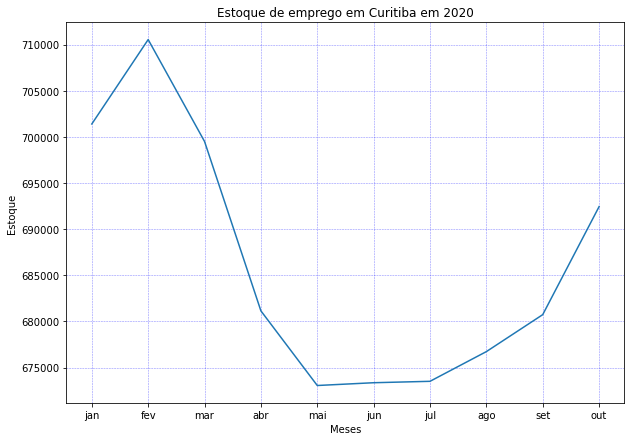

In [130]:
fig, ax = plt.subplots()

ax.plot(estoque)

ax.set(xlabel='Meses', ylabel='Estoque', title='Estoque de emprego em Curitiba em 2020')

ax.grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)

#plt.rcParams['figure.figsize'] = (10,7)

plt.show()

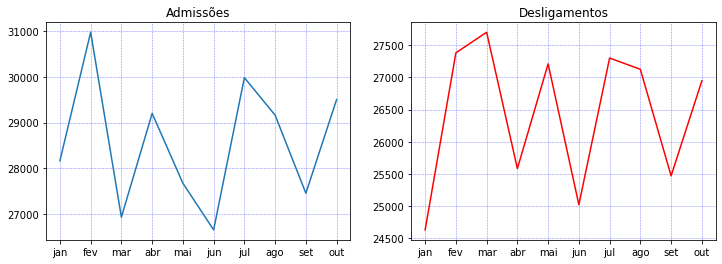

In [153]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

axes[0].plot(adm_19)
axes[0].set_title("Admissões")
axes[0].grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)

axes[1].plot(desl_19, color='r')
axes[1].axis('tight')
axes[1].set_title("Desligamentos")
axes[1].grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)

plt.show()

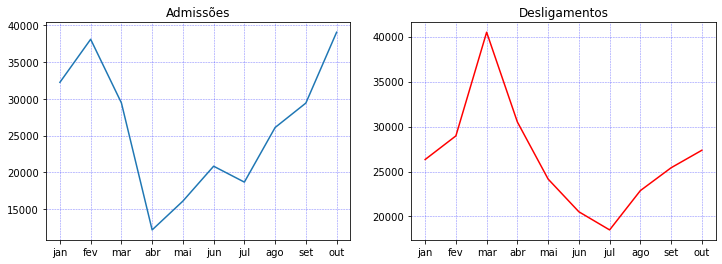

In [151]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

axes[0].plot(adm_20)
axes[0].set_title("Admissões")
axes[0].grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)

axes[1].plot(desl_20, color='r')
axes[1].axis('tight')
axes[1].set_title("Desligamentos")
axes[1].grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)

plt.show()

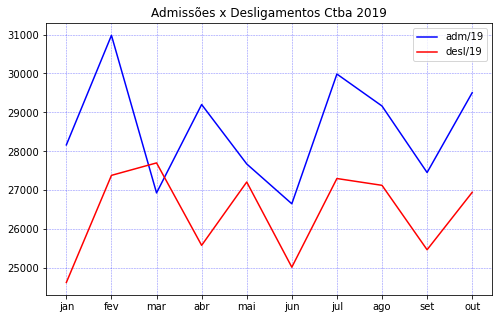

In [150]:
fig, ax = plt.subplots()
ax.plot(adm_19, color="b")
ax.plot(desl_19, color="r")
ax.set_title("Admissões x Desligamentos Ctba 2019")
ax.grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)
plt.legend(('adm/19', 'desl/19'))
#plt.rcParams['figure.figsize'] = (8,5)
plt.show();

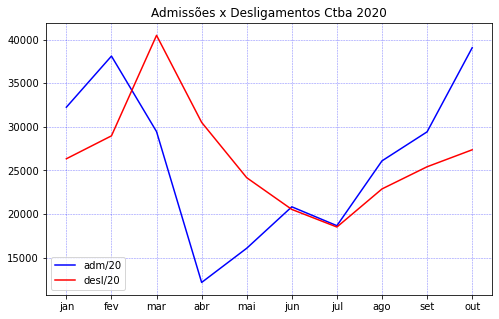

In [149]:
fig, ax = plt.subplots()
ax.plot(adm_20, color="b")
ax.plot(desl_20, color="r")
ax.set_title("Admissões x Desligamentos Ctba 2020")
ax.grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)
plt.legend(('adm/20', 'desl/20'))
#plt.rcParams['figure.figsize'] = (8,5)
plt.show();

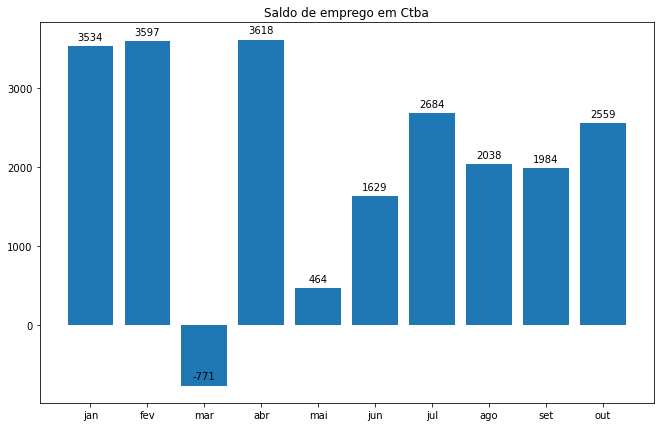

In [158]:
fig, ax = plt.subplots()
ax.bar(saldo_19.index, saldo_19, color='b')
#ax.bar(saldo_20.index, saldo_20, color='r')
ax.set_title('Saldo de emprego em Ctba')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 4),  
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(ax.bar(saldo_19.index, saldo_19))
#autolabel(ax.bar(saldo_20.index, saldo_20))
plt.rcParams['figure.figsize'] = (11,7)
plt.show()

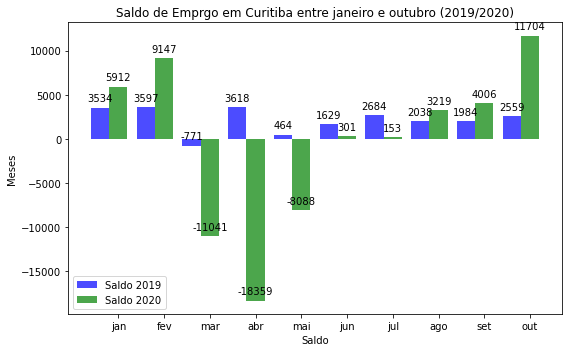

In [218]:
grupos = 10
fig, ax = plt.subplots()
indice = np.arange(grupos)
bar_larg = 0.4
transp = 0.7
#plt.bar(indice, saldo_19, bar_larg, alpha=transp, color='b', label='Saldo 2019')
#plt.bar(indice + bar_larg, saldo_20, bar_larg, alpha=transp, color='g', label='Saldo 2020')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 4),  
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(ax.bar(indice, saldo_19, bar_larg, alpha=transp, color='b', label='Saldo 2019'))
autolabel(ax.bar(indice + bar_larg, saldo_20, bar_larg, alpha=transp, color='g', label='Saldo 2020'))

plt.xlabel('Saldo') 
plt.ylabel('Meses') 
plt.title('Saldo de Emprgo em Curitiba entre janeiro e outubro (2019/2020)') 
plt.xticks(indice + bar_larg, ('jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out')) 
plt.legend() 
plt.tight_layout() 
plt.show()


In [232]:
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)


In [241]:
fig = go.Figure(
   data=[
       go.Bar(
           x=saldo_19.index,
           y=saldo_19,
           name='saldo/19',
           marker=dict(color='blue')
       ),
       go.Bar(
           x=saldo_20.index,
           y=saldo_20,
           name='saldo/20',
           marker=dict(color='green')
       ),
   ],
   layout=go.Layout(
       title='Saldo de Emprgo em Curitiba entre janeiro e outubro (2019/2020)'
   )
)
fig.show()